In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the Data

In [2]:
#Premier league
#saving each season as a data frame
df1_fbd = pd.read_csv("pl0910.csv")
df2_fbd = pd.read_csv("pl1011.csv")
df3_fbd = pd.read_csv("pl1112.csv")
df4_fbd = pd.read_csv("pl1213.csv")
df5_fbd = pd.read_csv("pl1314.csv")
df6_fbd = pd.read_csv("pl1415.csv")
df7_fbd = pd.read_csv("pl1516.csv")
df8_fbd = pd.read_csv("pl1617.csv")
df9_fbd = pd.read_csv("pl1718.csv") 
df10_fbd = pd.read_csv("pl1819.csv")
df11_fbd = pd.read_csv("pl1920.csv")
df12_fbd = pd.read_csv("pl2021.csv")

#Renaming teams so fbd and fbref match
team_mapping ={
    'Wigan Athletic': 'Wigan',
    'Manchester City': 'Man City',
    'Hull City': 'Hull',
    'Manchester Utd': 'Man United',
    'Birmingham City' : 'Birmingham',
    'Stoke City':'Stoke',
    'Newcastle Utd' : 'Newcastle', 
    'Swansea City' : 'Swansea',
    'Wigan Athletic' : 'Wigan',
    'Norwich City' : 'Norwich',
    'Cardiff City' : 'Cardiff',
    'Leicester City' : 'Leicester',
    'Sheffield Utd' : 'Sheffield United',
    'Leeds United' : 'Leeds',
}

In [3]:
#2009/2010
df1_fbd = df1_fbd.iloc[:, :23] #Remove betting data
df1_fbref = pd.read_html('https://fbref.com/en/comps/9/2009-2010/schedule/2009-2010-Premier-League-Scores-and-Fixtures')[0]
#Selecting the home, away and attendance columns 
df1_fbref = df1_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 6,7]]  
df1_fbref['Home'] = df1_fbref['Home'].replace(team_mapping)#Replacing home teams
df1_fbref['Away'] = df1_fbref['Away'].replace(team_mapping)#Replacing away teams
df1 = df1_fbd.merge(df1_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], 
                    right_on=['Home', 'Away'], how='left')
df1_fbd['Attendance'] = df1['Attendance']
df1 = df1.drop(['Home', 'Away'], axis =1) #Drop home and away 

#2010/2011
df2_fbd = df2_fbd.iloc[:, :23]#Remove betting data
df2_fbref = pd.read_html('https://fbref.com/en/comps/9/2010-2011/schedule/2010-2011-Premier-League-Scores-and-Fixtures')[0]
#Selecting the home, away and attendance columns 
df2_fbref = df2_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 6, 7]] 
df2_fbref['Home'] = df2_fbref['Home'].replace(team_mapping)#Replacing home teams
df2_fbref['Away'] = df2_fbref['Away'].replace(team_mapping)#Replacing away teams
df2 = df2_fbd.merge(df2_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], 
                    right_on=['Home', 'Away'], how='left')
df2_fbd['Attendance'] = df2['Attendance']
df2 = df2.drop(['Home', 'Away'], axis =1) #Drop home and away 

#2011/2012
df3_fbd = df3_fbd.iloc[:, :23]#Remove betting data
df3_fbref = pd.read_html('https://fbref.com/en/comps/9/2011-2012/schedule/2011-2012-Premier-League-Scores-and-Fixtures')[0]
#Selecting the home, away and attendance columns 
df3_fbref = df3_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 6, 7]] 
df3_fbref['Home'] = df3_fbref['Home'].replace(team_mapping)#Replacing home teams
df3_fbref['Away'] = df3_fbref['Away'].replace(team_mapping)#Replacing away teams
df3 = df3_fbd.merge(df3_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], 
                    right_on=['Home', 'Away'], how='left')
df3_fbd['Attendance'] = df3['Attendance']
df3 = df3.drop(['Home', 'Away'], axis =1) #Drop home and away 

#2012/2013
df4_fbd = df4_fbd.iloc[:, :23]#Remove betting data
df4_fbref = pd.read_html('https://fbref.com/en/comps/9/2012-2013/schedule/2012-2013-Premier-League-Scores-and-Fixtures')[0]
df4_fbref = df4_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 6, 7]] #Selecting the home, away and attendance columns 
df4_fbref['Home'] = df4_fbref['Home'].replace(team_mapping)#Replacing home teams
df4_fbref['Away'] = df4_fbref['Away'].replace(team_mapping)#Replacing away teams
df4 = df4_fbd.merge(df4_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df4_fbd['Attendance'] = df4['Attendance']
df4 = df4.drop(['Home', 'Away'], axis =1) #Drop home and away 
               
#2013/2014
df5_fbd = df5_fbd.iloc[:, :23]#Remove betting data
df5_fbref = pd.read_html('https://fbref.com/en/comps/9/2013-2014/schedule/2013-2014-Premier-League-Scores-and-Fixtures')[0]
df5_fbref = df5_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 6, 7]] #Selecting the home, away and attendance columns 
df5_fbref['Home'] = df5_fbref['Home'].replace(team_mapping)#Replacing home teams
df5_fbref['Away'] = df5_fbref['Away'].replace(team_mapping)#Replacing away teams
df5 = df5_fbd.merge(df5_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df5_fbd['Attendance'] = df5['Attendance']
df5 = df5.drop(['Home', 'Away'], axis =1) #Drop home and away 

#2014/2015
df6_fbd = df6_fbd.iloc[:, :23]#Remove betting data
df6_fbref = pd.read_html('https://fbref.com/en/comps/9/2014-2015/schedule/2014-2015-Premier-League-Scores-and-Fixtures')[0]
df6_fbref = df6_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 6, 7]] #Selecting the home, away and attendance columns
df6_fbref['Home'] = df6_fbref['Home'].replace(team_mapping)#Replacing home teams
df6_fbref['Away'] = df6_fbref['Away'].replace(team_mapping)#Replacing away teams
df6 = df6_fbd.merge(df6_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df6_fbd['Attendance'] = df6['Attendance']
df6 = df6.drop(['Home', 'Away'], axis =1) #Drop home and away 

#2015/2016
df7_fbd = df7_fbd.iloc[:, :23]#Remove betting data
df7_fbref = pd.read_html('https://fbref.com/en/comps/9/2015-2016/schedule/2015-2016-Premier-League-Scores-and-Fixtures')[0]
df7_fbref = df7_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 6, 7]] #Selecting the home, away and attendance columns 
df7_fbref['Home'] = df7_fbref['Home'].replace(team_mapping)#Replacing home teams
df7_fbref['Away'] = df7_fbref['Away'].replace(team_mapping)#Replacing away teams
df7 = df7_fbd.merge(df7_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df7_fbd['Attendance'] = df7['Attendance']
df7 = df7.drop(['Home', 'Away'], axis =1) #Drop home and away 

#2016/2017
df8_fbd = df8_fbd.iloc[:, :23]#Remove betting data
df8_fbref = pd.read_html('https://fbref.com/en/comps/9/2016-2017/schedule/2016-2017-Premier-League-Scores-and-Fixtures')[0]
df8_fbref = df8_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 6, 7]] #Selecting the home, away and attendance columns 
df8_fbref['Home'] = df8_fbref['Home'].replace(team_mapping)#Replacing home teams
df8_fbref['Away'] = df8_fbref['Away'].replace(team_mapping)#Replacing away teams
df8 = df8_fbd.merge(df8_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df8_fbd['Attendance'] = df8['Attendance']
df8 = df8.drop(['Home', 'Away'], axis =1) #Drop home and away 

#2017/2018
df9_fbd = df9_fbd.iloc[:, :23]#Remove betting data
df9_fbref = pd.read_html('https://fbref.com/en/comps/9/2017-2018/schedule/2017-2018-Premier-League-Scores-and-Fixtures')[0]
df9_fbref = df9_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 8, 9]] #Selecting the home, away and attendance columns 
df9_fbref['Home'] = df9_fbref['Home'].replace(team_mapping)#Replacing home teams
df9_fbref['Away'] = df9_fbref['Away'].replace(team_mapping)#Replacing away teams
df9 = df9_fbd.merge(df9_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df9_fbd['Attendance'] = df9['Attendance']
df9 = df9.drop(['Home', 'Away'], axis =1) #Drop home and away 

#2018/2019
df10_fbd = df10_fbd.iloc[:, :23]#Remove betting data
df10_fbref = pd.read_html('https://fbref.com/en/comps/9/2018-2019/schedule/2018-2019-Premier-League-Scores-and-Fixtures')[0]
df10_fbref = df10_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 8, 9]] #Selecting the home, away and attendance columns 
df10_fbref['Home'] = df10_fbref['Home'].replace(team_mapping)#Replacing home teams
df10_fbref['Away'] = df10_fbref['Away'].replace(team_mapping)#Replacing away teams
df10 = df10_fbd.merge(df10_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df10_fbd['Attendance'] = df10['Attendance']
df10 = df10.drop(['Home', 'Away'], axis =1) #Drop home and away 

#2019/2020
df11_fbd = df11_fbd.iloc[:, :24]#Remove betting data
df11_fbref = pd.read_html('https://fbref.com/en/comps/9/2019-2020/schedule/2019-2020-Premier-League-Scores-and-Fixtures')[0]
df11_fbref = df11_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 8, 9]] #Selecting the home, away and attendance columns 
df11_fbref['Home'] = df11_fbref['Home'].replace(team_mapping)#Replacing home teams
df11_fbref['Away'] = df11_fbref['Away'].replace(team_mapping)#Replacing away teams
df11 = df11_fbd.merge(df11_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df11_fbd['Attendance'] = df11['Attendance']
df11 = df11.drop(['Home', 'Away'], axis =1) #Drop home and away 

#2020/2021
df12_fbd = df12_fbd.iloc[:, :24]#Remove betting data
df12_fbref = pd.read_html('https://fbref.com/en/comps/9/2020-2021/schedule/2020-2021-Premier-League-Scores-and-Fixtures')[0]
df12_fbref = df12_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 8, 9]] #Selecting the home, away and attendance columns 
df12_fbref['Home'] = df12_fbref['Home'].replace(team_mapping)#Replacing home teams
df12_fbref['Away'] = df12_fbref['Away'].replace(team_mapping)#Replacing away teams
df12 = df12_fbd.merge(df12_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df12_fbd['Attendance'] = df12['Attendance']
df12 = df12.drop(['Home', 'Away'], axis =1) #Drop home and away 


#Adding all data frames together
premier_league = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], axis=0).dropna(how='all').reset_index(drop=True)


# Save the combined data frame to a new CSV file
premier_league.to_csv('premier_league.csv', index=False)

# Adding Season Column

In [4]:
# Create a Season column 
start_year = 2009
premier_league['Season'] = [f"{start_year + i // 380}/{start_year + i // 380 + 1}" for i in range(len(premier_league))]

# Move the season column to be the second column
premier_league.insert(1, 'Season', premier_league.pop('Season'))


# Data Cleaning

In [5]:
premier_league.head(10)

,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HF,AF,HC,AC,HY,AY,HR,AR,Attendance,Time
0,E0,2009/2010,15/08/09,Aston Villa,Wigan,0.0,2.0,A,0.0,1.0,...,15.0,14.0,4.0,6.0,2.0,2.0,0.0,0.0,35578.0,NaN
1,E0,2009/2010,15/08/09,Blackburn,Man City,0.0,2.0,A,0.0,1.0,...,12.0,9.0,5.0,4.0,2.0,1.0,0.0,0.0,29584.0,NaN
2,E0,2009/2010,15/08/09,Bolton,Sunderland,0.0,1.0,A,0.0,1.0,...,16.0,10.0,4.0,7.0,2.0,1.0,0.0,0.0,22247.0,NaN
3,E0,2009/2010,15/08/09,Chelsea,Hull,2.0,1.0,H,1.0,1.0,...,13.0,15.0,12.0,4.0,1.0,2.0,0.0,0.0,41597.0,NaN
4,E0,2009/2010,15/08/09,Everton,Arsenal,1.0,6.0,A,0.0,3.0,...,11.0,13.0,4.0,9.0,0.0,0.0,0.0,0.0,39309.0,NaN
5,E0,2009/2010,15/08/09,Portsmouth,Fulham,0.0,1.0,A,0.0,1.0,...,11.0,18.0,6.0,4.0,3.0,2.0,0.0,0.0,17510.0,NaN
6,E0,2009/2010,15/08/09,Stoke,Burnley,2.0,0.0,H,2.0,0.0,...,15.0,10.0,3.0,6.0,2.0,2.0,0.0,0.0,27385.0,NaN
7,E0,2009/2010,15/08/09,Wolves,West Ham,0.0,2.0,A,0.0,1.0,...,9.0,5.0,8.0,6.0,0.0,0.0,0.0,0.0,28674.0,NaN
8,E0,2009/2010,16/08/09,Man United,Birmingham,1.0,0.0,H,1.0,0.0,...,13.0,7.0,13.0,2.0,1.0,1.0,0.0,0.0,75062.0,NaN
9,E0,2009/2010,16/08/09,Tottenham,Liverpool,2.0,1.0,H,1.0,0.0,...,14.0,16.0,6.0,5.0,3.0,3.0,0.0,0.0,35935.0,NaN


In [6]:
#Shape
premier_league.shape

(4560, 26)

In [8]:
#Identifying missing values
premier_league.isnull().sum()

#Empty cells in attendance and time.
#time will be removed as it only appears in a select few later seasons
#attendance will be investigated to see if any of these missing values are pre covid, all missing attendances will be change to have 0 in the cell

Div              0
Season           0
Date             0
HomeTeam         0
AwayTeam         0
FTHG             0
FTAG             0
FTR              0
HTHG             0
HTAG             0
HTR              0
Referee          0
HS               0
AS               0
HST              0
AST              0
HF               0
AF               0
HC               0
AC               0
HY               0
AY               0
HR               0
AR               0
Attendance     448
Time          3800
dtype: int64

In [9]:
#checking if any of the attendance missing values were pre covid
premier_league_pre_covid = premier_league.iloc[0:4088]
premier_league_pre_covid[premier_league_pre_covid['Attendance'].isnull()]

,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HF,AF,HC,AC,HY,AY,HR,AR,Attendance,Time
64,E0,2009/2010,27/09/09,Sunderland,Wolves,5.0,2.0,H,1.0,0.0,...,18.0,11.0,7.0,8.0,1.0,3.0,0.0,0.0,NaN,NaN
76,E0,2009/2010,17/10/09,Arsenal,Birmingham,3.0,1.0,H,2.0,1.0,...,8.0,16.0,7.0,3.0,1.0,2.0,0.0,0.0,NaN,NaN
78,E0,2009/2010,17/10/09,Everton,Wolves,1.0,1.0,D,0.0,0.0,...,6.0,15.0,6.0,5.0,1.0,3.0,0.0,1.0,NaN,NaN
81,E0,2009/2010,17/10/09,Stoke,West Ham,2.0,1.0,H,1.0,1.0,...,16.0,13.0,5.0,6.0,3.0,3.0,0.0,0.0,NaN,NaN
196,E0,2009/2010,05/01/10,Stoke,Fulham,3.0,2.0,H,3.0,0.0,...,13.0,7.0,8.0,10.0,1.0,0.0,0.0,0.0,NaN,NaN
230,E0,2009/2010,02/02/10,Hull,Chelsea,1.0,1.0,D,1.0,1.0,...,9.0,12.0,6.0,8.0,1.0,3.0,0.0,0.0,NaN,NaN
280,E0,2009/2010,10/03/10,Burnley,Stoke,1.0,1.0,D,0.0,1.0,...,12.0,10.0,4.0,4.0,2.0,0.0,0.0,0.0,NaN,NaN
702,E0,2010/2011,16/04/11,West Ham,Aston Villa,1.0,2.0,A,1.0,1.0,...,8.0,3.0,5.0,11.0,0.0,0.0,0.0,0.0,NaN,NaN


In [10]:
#Identify rows with missing attendance values in the first 4089 rows
missing_attendance_rows = premier_league.loc[:4087][pd.isnull(premier_league.loc[:4087, 'Attendance'])]

#Iterate over the missing rows and fill in the missing attendance values
for index, row in missing_attendance_rows.iterrows():
    # Extract relevant information from the current row
    home_team = row['HomeTeam']
    season = row['Season']

    # Calculate the average attendance for the HomeTeam in the current season
    average_attendance = premier_league[(premier_league['HomeTeam'] == home_team) & (premier_league['Season'] == season)]['Attendance'].mean()

    # Fill in the missing attendance value with the calculated average
    premier_league.at[index, 'Attendance'] = round(average_attendance, 0)

    
#replace all missing values with zero 
premier_league['Attendance'].fillna(0, inplace=True) 

In [11]:
#removing the time axis
premier_league = premier_league.drop('Time', axis=1)

In [12]:
#removing the referee column
premier_league = premier_league.drop('Referee', axis=1)

In [13]:
#Checking to see if there are any missing data points
premier_league.isnull().sum()

Div           0
Season        0
Date          0
HomeTeam      0
AwayTeam      0
FTHG          0
FTAG          0
FTR           0
HTHG          0
HTAG          0
HTR           0
HS            0
AS            0
HST           0
AST           0
HF            0
AF            0
HC            0
AC            0
HY            0
AY            0
HR            0
AR            0
Attendance    0
dtype: int64

In [50]:
#displaying the data types 
premier_league.dtypes

Div            object
Season         object
Date           object
HomeTeam       object
AwayTeam       object
FTHG          float64
FTAG          float64
FTR            object
HTHG          float64
HTAG          float64
HTR            object
HS            float64
AS            float64
HST           float64
AST           float64
HF            float64
AF            float64
HC            float64
AC            float64
HY            float64
AY            float64
HR            float64
AR            float64
Attendance    float64
dtype: object

In [51]:
#check any duplicated rows
premier_league.duplicated().sum()

0

In [14]:
#Describe the data
premier_league.describe().T

,count,mean,std,min,25%,50%,75%,max
FTHG,4560.0,1.547807,1.317337,0.0,1.0,1.0,2.00,9.0
FTAG,4560.0,1.195614,1.173061,0.0,0.0,1.0,2.00,9.0
HTHG,4560.0,0.690132,0.841608,0.0,0.0,0.0,1.00,5.0
HTAG,4560.0,0.531579,0.743688,0.0,0.0,0.0,1.00,5.0
HS,4560.0,13.998684,5.518280,0.0,10.0,13.0,17.00,43.0
AS,4560.0,11.254825,4.752203,0.0,8.0,11.0,14.00,30.0
HST,4560.0,5.770395,3.356777,0.0,3.0,5.0,8.00,24.0
AST,4560.0,4.643421,2.824865,0.0,3.0,4.0,6.00,20.0
HF,4560.0,10.657895,3.420270,0.0,8.0,11.0,13.00,24.0
AF,4560.0,11.072588,3.586091,1.0,9.0,11.0,13.00,26.0


# Adding New Variable

In [16]:
# Home team average goals scored at home full time
premier_league['HAGSFT'] = (
    premier_league.groupby(['Season', 'HomeTeam'])['FTHG']  # Grouping by season and home team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)


#Away team average goals scored away full time 
premier_league['AAGSFT'] = (
    premier_league.groupby(['Season', 'AwayTeam'])['FTAG'] #Grouping by season and home team, selecting FTAG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average goals scored at home half time
premier_league['HAGSHT'] = (
    premier_league.groupby(['Season', 'HomeTeam'])['HTHG'] #Grouping by season and home team, selecting HTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average goals scored away half time 
premier_league['AAGSHT'] = (
    premier_league.groupby(['Season', 'AwayTeam'])['HTAG'] #Grouping by season and home team, selecting HTAG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



# Home team average goals conceded at home fill time
premier_league['HAGCFT'] = (
    premier_league.groupby(['Season', 'HomeTeam'])['FTAG']  # Grouping by season and home team, selecting FTAG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

# Away team average goals conceded away full time 
premier_league['AAGCFT'] = (
    premier_league.groupby(['Season', 'AwayTeam'])['FTHG']  # Grouping by season and away team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)


#Home team average red cards at home 
premier_league['HAR'] = (
    premier_league.groupby(['Season', 'HomeTeam'])['HR'] #Grouping by season and home team, selecting HR
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average red cards away 
premier_league['AAR'] = (
    premier_league.groupby(['Season', 'AwayTeam'])['AR'] #Grouping by season and home team, selecting AR
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average yellow cards at home 
premier_league['HAY'] = (
    premier_league.groupby(['Season', 'HomeTeam'])['HY'] #Grouping by season and home team, selecting HY
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average yellow cards away 
premier_league['AAY'] = (
    premier_league.groupby(['Season', 'AwayTeam'])['AY'] #Grouping by season and home team, selecting AY
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)


#Home team average fouls at home 
premier_league['HAF'] = (
    premier_league.groupby(['Season', 'HomeTeam'])['HF'] #Grouping by season and home team, selecting HF
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average fouls away 
premier_league['AAF'] = (
    premier_league.groupby(['Season', 'AwayTeam'])['AF'] #Grouping by season and home team, selecting AF
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average corners at home 
premier_league['HAC'] = (
    premier_league.groupby(['Season', 'HomeTeam'])['HC'] #Grouping by season and home team, selecting HC
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average corners away 
premier_league['AAC'] = (
    premier_league.groupby(['Season', 'AwayTeam'])['AC'] #Grouping by season and home team, selecting AC
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average shots at home 
premier_league['HAS'] = (
    premier_league.groupby(['Season', 'HomeTeam'])['HS'] #Grouping by season and home team, selecting HS
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average shots away 
premier_league['AAS'] = (
    premier_league.groupby(['Season', 'AwayTeam'])['AS'] #Grouping by season and home team, selecting AS
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average shots on target at home 
premier_league['HAST'] = (
    premier_league.groupby(['Season', 'HomeTeam'])['HST'] #Grouping by season and home team, selecting HST
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average shots on target away 
premier_league['AAST'] = (
    premier_league.groupby(['Season', 'AwayTeam'])['AST'] #Grouping by season and home team, selecting AST
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)






#Home team percentage of games won, lost and drawn at home
#Create new columns to store cumulative statistics for each HomeTeam's away games
premier_league['home_games'] = 0
premier_league['home_won'] = 0
premier_league['home_lost'] = 0
premier_league['home_drawn'] = 0

# Create dictionary to keep track of cumulative statistics for each HomeTeam within each season
cumulative_stats_by_season = {}

# Iterate through each row 
for index, row in premier_league.iterrows():
    home_team = row['HomeTeam']
    season = row['Season']

    # If the AwayTeam is not in the dictionary for the current season, all stats are zero
    if (home_team, season) not in cumulative_stats_by_season:
        cumulative_stats_by_season[(home_team, season)] = {'home_games': 0, 'home_won': 0, 'home_lost': 0, 'home_drawn': 0}

    # Update cumulative statistics based on the FTR result
    cumulative_stats_by_season[(home_team, season)]['home_games'] += 1
    cumulative_stats_by_season[(home_team, season)]['home_won'] += (row['FTR'] == 'H')
    cumulative_stats_by_season[(home_team, season)]['home_lost'] += (row['FTR'] == 'A')
    cumulative_stats_by_season[(home_team, season)]['home_drawn'] += (row['FTR'] == 'D')

    # Assign cumulative statistics to the corresponding columns in the data frame
    premier_league.at[index, 'home_games'] = cumulative_stats_by_season[(home_team, season)]['home_games']
    premier_league.at[index, 'home_won'] = cumulative_stats_by_season[(home_team, season)]['home_won']
    premier_league.at[index, 'home_lost'] = cumulative_stats_by_season[(home_team, season)]['home_lost']
    premier_league.at[index, 'home_drawn'] = cumulative_stats_by_season[(home_team, season)]['home_drawn']

    # If it's the first match of a new season, reset the cumulative stats for that AwayTeam
    if index > 0 and season != premier_league.at[index - 1, 'Season']:
        cumulative_stats_by_season[(home_team, season)] = {'home_games': 0, 'home_won': 0, 'home_lost': 0, 'home_drawn': 0}

#For each team shift the statsitcs down a row 
premier_league['home_won'] = premier_league.groupby('HomeTeam')['home_won'].transform(lambda x: x.shift(1))
premier_league['home_drawn'] = premier_league.groupby('HomeTeam')['home_drawn'].transform(lambda x: x.shift(1))
premier_league['home_lost'] = premier_league.groupby('HomeTeam')['home_lost'].transform(lambda x: x.shift(1))
premier_league['home_games'] = premier_league.groupby('HomeTeam')['home_games'].transform(lambda x: x.shift(1))
# Replace NaN values in the columns with 0
premier_league['home_won'].fillna(0, inplace=True)
premier_league['home_drawn'].fillna(0, inplace=True)
premier_league['home_lost'].fillna(0, inplace=True)
premier_league['home_games'].fillna(0, inplace=True)

#calculate the means for each row
premier_league['HAWH'] = premier_league['home_won'] / premier_league['home_games']
premier_league['HALH'] = premier_league['home_lost'] / premier_league['home_games']
premier_league['HADH'] = premier_league['home_drawn'] / premier_league['home_games']


# Identify the first row of each AwayTeam in a new season
first_row_mask = premier_league.groupby(['Season', 'HomeTeam']).cumcount() == 0
# Set the values to zero
premier_league.loc[first_row_mask, ['HAWH', 'HALH', 'HADH']] = 0

#Remove the rows from the data frame 
premier_league =premier_league.drop(columns=['home_won','home_lost','home_drawn','home_games'],axis=1)







#Away team decimal of games won lost and drawn at home per season
# Create new columns to store cumulative statistics for each AwayTeam's away games
premier_league['away_games'] = 0
premier_league['away_won'] = 0
premier_league['away_lost'] = 0
premier_league['away_drawn'] = 0

# Create dictionary to keep track of cumulative statistics for each AwayTeam within each season
cumulative_stats_by_season = {}

# Iterate through each row 
for index, row in premier_league.iterrows():
    away_team = row['AwayTeam']
    season = row['Season']

    # If the AwayTeam is not in the dictionary for the current season, all stats are zero
    if (away_team, season) not in cumulative_stats_by_season:
        cumulative_stats_by_season[(away_team, season)] = {'away_games': 0, 'away_won': 0, 'away_lost': 0, 'away_drawn': 0}

    # Update cumulative statistics based on the FTR result
    cumulative_stats_by_season[(away_team, season)]['away_games'] += 1
    cumulative_stats_by_season[(away_team, season)]['away_won'] += (row['FTR'] == 'A')
    cumulative_stats_by_season[(away_team, season)]['away_lost'] += (row['FTR'] == 'H')
    cumulative_stats_by_season[(away_team, season)]['away_drawn'] += (row['FTR'] == 'D')

    # Assign cumulative statistics to the corresponding columns in the DataFrame
    premier_league.at[index, 'away_games'] = cumulative_stats_by_season[(away_team, season)]['away_games']
    premier_league.at[index, 'away_won'] = cumulative_stats_by_season[(away_team, season)]['away_won']
    premier_league.at[index, 'away_lost'] = cumulative_stats_by_season[(away_team, season)]['away_lost']
    premier_league.at[index, 'away_drawn'] = cumulative_stats_by_season[(away_team, season)]['away_drawn']

    # If it's the first match of a new season, reset the cumulative stats for that AwayTeam
    if index > 0 and season != premier_league.at[index - 1, 'Season']:
        cumulative_stats_by_season[(away_team, season)] = {'away_games': 0, 'away_won': 0, 'away_lost': 0, 'away_drawn': 0}

#For each team shift the statsitcs down a row 
premier_league['away_won'] = premier_league.groupby('AwayTeam')['away_won'].transform(lambda x: x.shift(1))
premier_league['away_drawn'] = premier_league.groupby('AwayTeam')['away_drawn'].transform(lambda x: x.shift(1))
premier_league['away_lost'] = premier_league.groupby('AwayTeam')['away_lost'].transform(lambda x: x.shift(1))
premier_league['away_games'] = premier_league.groupby('AwayTeam')['away_games'].transform(lambda x: x.shift(1))
# Replace NaN values in the columns with 0
premier_league['away_won'].fillna(0, inplace=True)
premier_league['away_drawn'].fillna(0, inplace=True)
premier_league['away_lost'].fillna(0, inplace=True)
premier_league['away_games'].fillna(0, inplace=True)

#calculate the means for each row
premier_league['AAWA'] = premier_league['away_won'] / premier_league['away_games']
premier_league['AALA'] = premier_league['away_lost'] / premier_league['away_games']
premier_league['AADA'] = premier_league['away_drawn'] / premier_league['away_games']


# Identify the first row of each AwayTeam in a new season
first_row_mask = premier_league.groupby(['Season', 'AwayTeam']).cumcount() == 0
# Set the values to zero
premier_league.loc[first_row_mask, ['AAWA', 'AALA', 'AADA']] = 0

#Remove the rows from the data frame 
premier_league =premier_league.drop(columns=['away_won','away_lost','away_drawn','away_games'],axis=1)

In [17]:
#Adding a new column for if the match was pre or during covid
# Set pre_covid to True for rows up to index 4087, and False for rows after that index
premier_league['Pre_covid']=premier_league.index <= 4087 

#Creating pre and during covid data frame
premier_league_pre_covid = premier_league[premier_league['Pre_covid'] == True]
premier_league_during_covid = premier_league[premier_league['Pre_covid'] == False]

In [18]:
#Adding home and away points 
premier_league['HomeTeamPoints'] = 0
premier_league['AwayTeamPoints'] = 0

# Function to update points based on match result
def update_points(row):
    if row['FTR'] == 'H':
        row['HomeTeamPoints'] += 3
    elif row['FTR'] == 'D':
        row['HomeTeamPoints'] += 1
        row['AwayTeamPoints'] += 1
    elif row['FTR'] == 'A':
        row['AwayTeamPoints'] += 3
    return row

# Apply the update_points function to each row
premier_league = premier_league.apply(update_points, axis=1)

# Create running tally of points for each team for each season
premier_league['HomeTeamPoints'] = premier_league.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].cumsum()
premier_league['AwayTeamPoints'] = premier_league.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].cumsum()




# Create a data frame to store total points for each team within each season
total_points_home = premier_league.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].max().reset_index()
total_points_away = premier_league.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].max().reset_index()

# Merge the data frame to combine home and away points
total_points = pd.merge(total_points_home, total_points_away, how='outer', left_on=['Season', 'HomeTeam'], right_on=['Season', 'AwayTeam'], suffixes=('_Home', '_Away'))

# Calculate total points for each team by combining home and away points
total_points['TotalPoints'] = total_points['HomeTeamPoints'] + total_points['AwayTeamPoints']

# Calculate HA as the ratio of home points to the sum of home points and away points to 4 decimal places
total_points['SeasonalHA'] = round(total_points['HomeTeamPoints'] / (total_points['HomeTeamPoints'] + total_points['AwayTeamPoints']), 4)

# Calculate OverallHA for each team by summing overall home points and away points, then applying the formula H / (H + A) to 4 decimal places
overall_ha = total_points.groupby('HomeTeam', as_index=False).agg({'HomeTeamPoints': 'sum', 'AwayTeamPoints': 'sum'})
overall_ha['OverallHA'] = round(overall_ha['HomeTeamPoints'] / (overall_ha['HomeTeamPoints'] + overall_ha['AwayTeamPoints']), 4)


# Merge SeasonHA and OverallHA into the total_points data frame
total_points = pd.merge(total_points, overall_ha[['HomeTeam', 'OverallHA']], how='left', left_on='HomeTeam', right_on='HomeTeam')

# Sort the DataFrame by 'Season' and 'TotalPoints' columns
total_points = total_points.sort_values(by=['Season', 'TotalPoints'], ascending=[True, False])

total_points = total_points[['Season', 'HomeTeam', 'HomeTeamPoints', 'AwayTeamPoints', 'TotalPoints', 'SeasonalHA', 'OverallHA']]



In [19]:
# Create initial columns for HomeTeamPoints and AwayTeamPoints for pre covid
premier_league_pre_covid['HomeTeamPoints'] = 0
premier_league_pre_covid['AwayTeamPoints'] = 0

# Function to update points based on match result
def update_points(row):
    if row['FTR'] == 'H':
        row['HomeTeamPoints'] += 3
    elif row['FTR'] == 'D':
        row['HomeTeamPoints'] += 1
        row['AwayTeamPoints'] += 1
    elif row['FTR'] == 'A':
        row['AwayTeamPoints'] += 3
    return row

# Apply the update_points function to each row
premier_league_pre_covid = premier_league_pre_covid.apply(update_points, axis=1)

# Create running tally of points for each team for each season
premier_league_pre_covid['HomeTeamPoints'] = premier_league_pre_covid.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].cumsum()
premier_league_pre_covid['AwayTeamPoints'] = premier_league_pre_covid.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].cumsum()



# Create initial columns for HomeTeamPoints and AwayTeamPoints for during covid
premier_league_during_covid['HomeTeamPoints'] = 0
premier_league_during_covid['AwayTeamPoints'] = 0


# Apply the update_points function to each row
premier_league_during_covid = premier_league_during_covid.apply(update_points, axis=1)

# Create running tally of points for each team for each season
premier_league_during_covid['HomeTeamPoints'] = premier_league_during_covid.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].cumsum()
premier_league_during_covid['AwayTeamPoints'] = premier_league_during_covid.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].cumsum()


# Calculate total points for each team within each season

# Create a DataFrame to store total points for each team within each season
total_points_home_pre = premier_league_pre_covid.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].max().reset_index()
total_points_home_during = premier_league_during_covid.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].max().reset_index()
total_points_away_pre = premier_league_pre_covid.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].max().reset_index()
total_points_away_during = premier_league_during_covid.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].max().reset_index()


#Aggregate the total points foe each team across the seasons 
total_points_home_pre = total_points_home_pre.groupby('HomeTeam')['HomeTeamPoints'].sum().reset_index()
total_points_home_during = total_points_home_during.groupby('HomeTeam')['HomeTeamPoints'].sum().reset_index()
total_points_away_pre = total_points_away_pre.groupby('AwayTeam')['AwayTeamPoints'].sum().reset_index()
total_points_away_during = total_points_away_during.groupby('AwayTeam')['AwayTeamPoints'].sum().reset_index()

#Rename columns for clarity 
total_points_home_pre= total_points_home_pre.rename(columns={'HomeTeamPoints':'HomePointsPreCovid', 'HomeTeam':'Team'})
total_points_home_during= total_points_home_during.rename(columns={'HomeTeamPoints':'HomePointsDuringCovid','HomeTeam':'Team'})
total_points_away_pre= total_points_away_pre.rename(columns={'AwayTeamPoints':'AwayPointsPreCovid','AwayTeam':'Team'})
total_points_away_during= total_points_away_during.rename(columns={'AwayTeamPoints':'AwayPointsDuringCovid','AwayTeam':'Team'})

#Merge the total points for home and away team and for pre covid and covid
points = pd.merge(total_points_home_pre, total_points_home_during, on='Team', how='outer')
points = pd.merge(points, total_points_away_pre, on='Team', how='outer')
points = pd.merge(points, total_points_away_during, on='Team', how='outer')



#Combine home and away points to get the total points for each team
points['TotalPointsPreCovid'] = points['HomePointsPreCovid'] + points['AwayPointsPreCovid']
points['TotalPointsDuringCovid'] = points['HomePointsDuringCovid'] + points['AwayPointsDuringCovid']

# Calculate HA as the ratio of home points to the sum of home points and away points to 4 decimal places
points['HAPreCovid'] = round(points['HomePointsPreCovid'] / (points['HomePointsPreCovid'] + points['AwayPointsPreCovid']), 4)
points['HADuringCovid'] = round(points['HomePointsDuringCovid'] / (points['HomePointsDuringCovid'] + points['AwayPointsDuringCovid']), 4)

#Create a new data frame with only relevant columns and fill all NaN with 0
ha_pre_during_covid = points.drop(columns=['HomePointsPreCovid','HomePointsDuringCovid','AwayPointsPreCovid','AwayPointsDuringCovid','TotalPointsPreCovid','TotalPointsDuringCovid'],axis=1)
ha_pre_during_covid = ha_pre_during_covid.fillna(0)

ha_pre_during_covid

,Team,HAPreCovid,HADuringCovid
0,Arsenal,0.5929,0.4935
1,Aston Villa,0.5566,0.4923
2,Birmingham,0.6629,0.0000
3,Blackburn,0.6694,0.0000
4,Blackpool,0.5128,0.0000
5,Bolton,0.6198,0.0000
6,Bournemouth,0.6029,0.5714
7,Brighton,0.6667,0.4717
8,Burnley,0.6356,0.4259
9,Cardiff,0.6250,0.0000


In [20]:
#Joining all tables 

# Merge the data frames based on Season and HomeTeam
merged_df = pd.merge(premier_league, total_points, how='left', left_on=['Season', 'HomeTeam'], right_on=['Season', 'HomeTeam'])

# Selecting and adding the columns
columns_to_add = ['OverallHA', 'SeasonalHA']
premier_league[columns_to_add] = merged_df[columns_to_add]

# Merge the result data frame based on team and HomeTeam
merged_df = pd.merge(premier_league, ha_pre_during_covid, how='left', left_on='HomeTeam', right_on='Team')

#selecting and adding the columns add to the main data frame
columns_to_add = ['HAPreCovid', 'HADuringCovid']
premier_league[columns_to_add] = merged_df[columns_to_add]

#Renaming the columns 
premier_league= premier_league.rename(columns={'Pre_covid':'PreCovid'})

In [21]:
#Save the data frame with new columns to csv
premier_league.to_csv('Premier_League.csv', index=False)

# Graphs

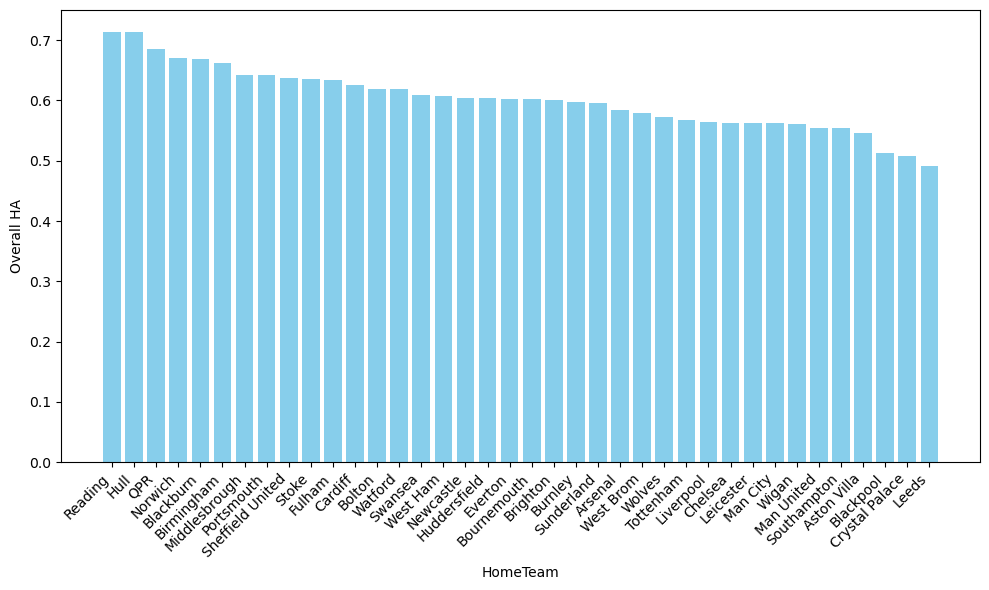

In [66]:
# Sort the DataFrame by OverallHA column in descending order
total_points = total_points.sort_values(by='OverallHA', ascending=False)

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(total_points['HomeTeam'], total_points['OverallHA'], color='skyblue')
plt.xlabel('HomeTeam')
plt.ylabel('Overall HA')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

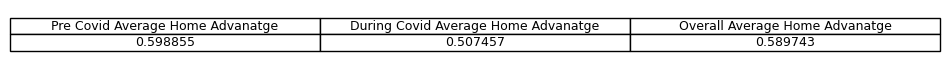

In [23]:
#Pre and during covid average home advantages 

#Calculate the HA for pre covid, during covid and overall, to 6 d.p.
ha_average_pre = round(premier_league.loc[:4088,'HAPreCovid'].mean(),6)
ha_average_during = round(premier_league.loc[4088:,'HADuringCovid'].mean(),6)
ha_average = round(premier_league.loc[:, 'OverallHA'].mean(),6)

#Create a dictoriary to kepp the avergaes in 
ha_means = {
            'Pre Covid Average Home Advanatge':[ha_average_pre],
           'During Covid Average Home Advanatge': [ha_average_during],
           'Overall Average Home Advanatge': [ha_average]}

#Create a data frame from the dictionary
ha_means = pd.DataFrame(ha_means)

#Create a figure and axis for displaying the data
fig = plt.figure(figsize = (12,.1))
ax = fig.add_subplot(111)

#Display the table
ax.table(cellText = ha_means.values, 
         colLabels = ha_means.columns, cellLoc='center')


#turn axes off
ax.axis('off')
#Show the plot
plt.show()

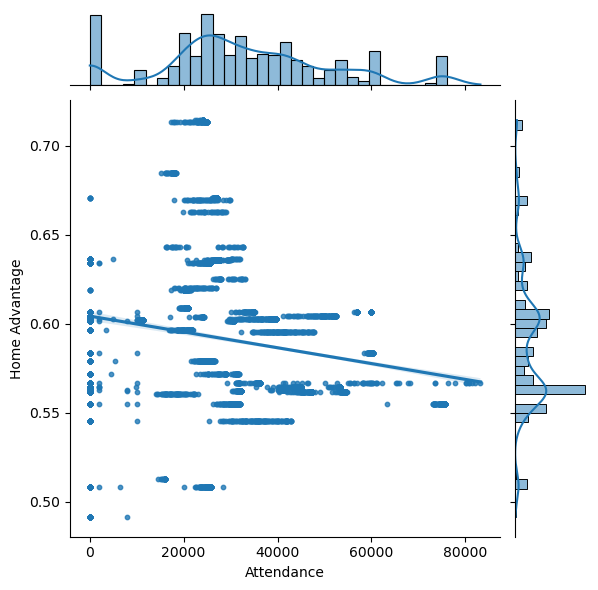

In [31]:
#A join plot using seaborn of attendacne and overallHA
joint_plot = sns.jointplot(x="Attendance", y="OverallHA", data=premier_league, kind='reg', fit_reg=True,scatter_kws={'s': 10})

# Set individual axis labels
joint_plot.set_axis_labels('Attendance', 'Home Advantage')


# Show the plot
plt.show()

# Cluster Analysis

## Attendance and Pre Covid Home Advanatge

In [25]:
#Creating two new data frames from the columns PreCovid
premier_league_pre_covid = premier_league[premier_league['PreCovid'] == True]
premier_league_during_covid = premier_league[premier_league['PreCovid'] == False]


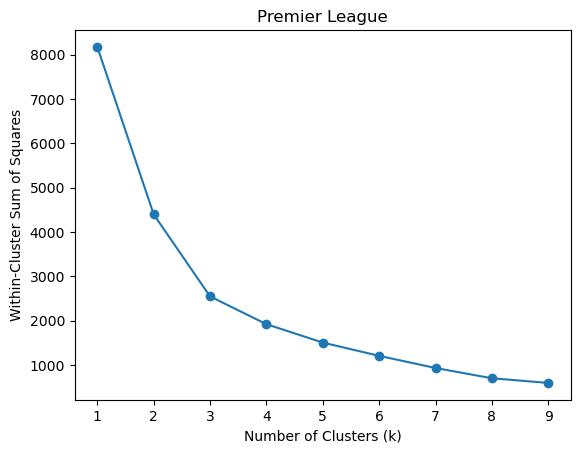

In [26]:
#Extracting the features
select_features = premier_league_pre_covid[['Attendance','HAPreCovid']]

#Scaling the features
scaler = StandardScaler()
select_features_standardised = scaler.fit_transform(select_features)

#Elbow method 
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(select_features_standardised)
    inertia.append(kmeans.inertia_)

#Plot the Elbow Method
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Premier League')
plt.show()

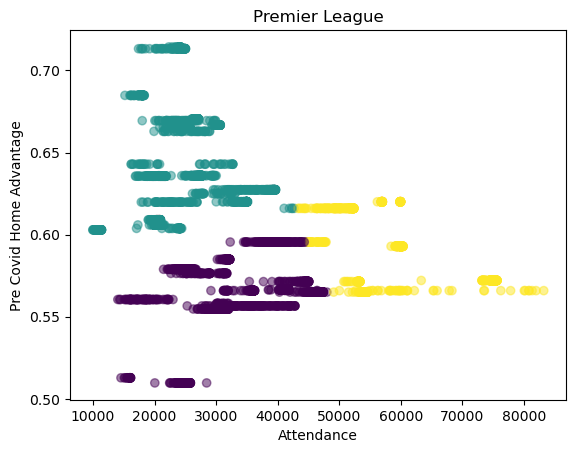

In [27]:
#choosing K
optimal_k = 3

# Apply K-means clustering with the chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
premier_league_pre_covid['Cluster'] = kmeans.fit_predict(select_features_standardised)

#Plot the clusters
plt.scatter(premier_league_pre_covid['Attendance'], premier_league_pre_covid['HAPreCovid'], c=premier_league_pre_covid['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Attendance')
plt.ylabel('Pre Covid Home Advantage')
plt.title('Premier League')
plt.show()


#cluster summary
cluster_summary = premier_league_pre_covid.groupby('Cluster')[['HAPreCovid', 'Attendance']].mean()
cluster_sizes = premier_league_pre_covid['Cluster'].value_counts().sort_index()
# Round 'Attendance' values to 0 decimal places
cluster_summary['Attendance'] = cluster_summary['Attendance'].round(0)




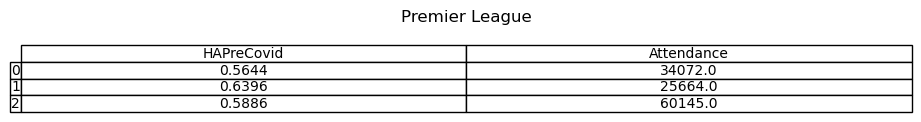

In [29]:
#Displaying the clusters
#Create a figure to show the table
fig = plt.figure(figsize = (11.5, .2))
ax = fig.add_subplot(111)

#Round the summaries to 4 d.p.
cluster_summary = round(cluster_summary,4)

#Display the summary in a table
ax.table(cellText = cluster_summary.values, rowLabels = cluster_summary.index, 
         colLabels = cluster_summary.columns, cellLoc='center')

#Title
ax.set_title('Premier League')
#turn axes off
ax.axis('off')
#Show table
plt.show()

## Match Statistic and Home Advanatge

### Pre Covid 

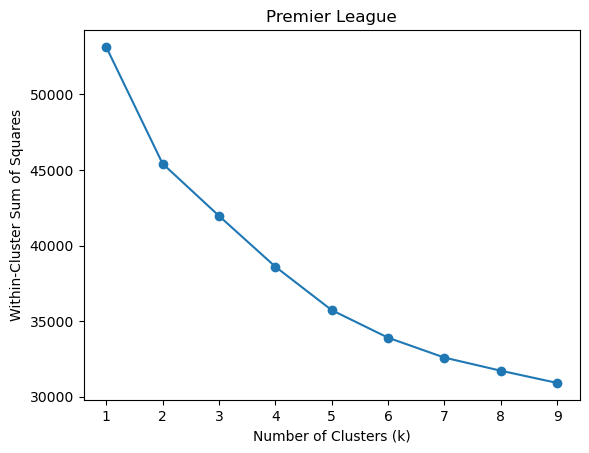

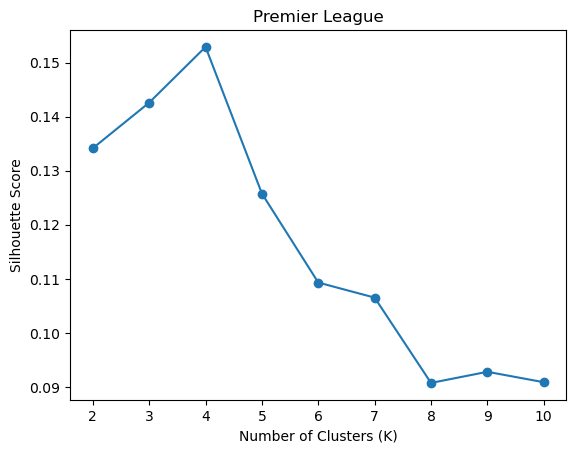

In [30]:
# Select features for clustering
select_features = premier_league_pre_covid[[ 'HS', 'AS', 'HST', 'AST', 'HC','AC','HF', 'AF', 'HY','AY','HR','AR', 'HAPreCovid']]

# Standardise the features
scaler = StandardScaler()
select_features_standardised = scaler.fit_transform(select_features)


#Elbow method 
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(select_features_standardised)
    inertia.append(kmeans.inertia_)

#Plot the Elbow Method
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Premier League')
plt.show()



# Evaluate silhouette scores for different values of K
silhouette_scores = []
for k in range(2, 11):  # You can adjust the range as needed
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(select_features_standardised)
    silhouette_avg = silhouette_score(select_features_standardised, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Method
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Premier League')
plt.show()

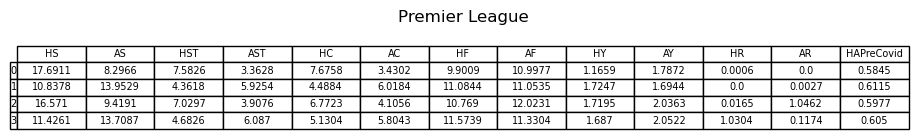

In [31]:
#Optimal value for k
optimal_k = 4
#Apply k-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
premier_league_pre_covid['Cluster'] = kmeans.fit_predict(select_features_standardised)


#cluster summary 
cluster_summary = premier_league_pre_covid.groupby('Cluster')[[ 'HS', 'AS', 'HST', 'AST', 'HC','AC','HF', 'AF', 'HY','AY','HR','AR','HAPreCovid']].mean()

#Create a figure displaying the table
fig = plt.figure(figsize = (11.5, .2))
ax = fig.add_subplot(111)
#Round the summaries to 4 d.p.
cluster_summary = round(cluster_summary,4)
#Display the summary in a table
ax.table(cellText = cluster_summary.values, rowLabels = cluster_summary.index, 
         colLabels = cluster_summary.columns, cellLoc='center')

#Title
ax.set_title('Premier League')
#turn axes off
ax.axis('off')
plt.show()

### Post Covid

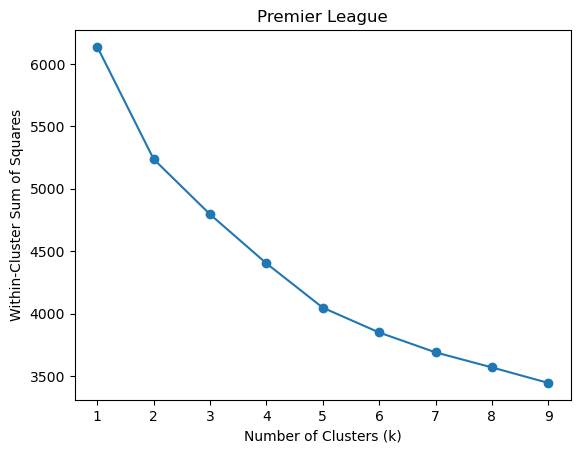

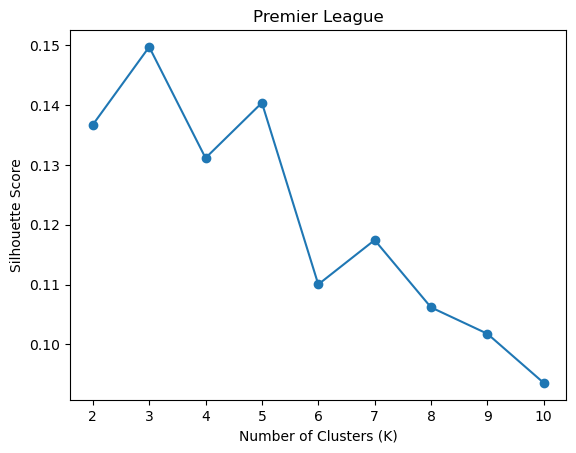

In [32]:
# Select features for clustering
select_features = premier_league_during_covid[['HS', 'AS', 'HST', 'AST', 'HC','AC','HF', 'AF', 'HY','AY','HR','AR','HADuringCovid']]

# Standardise the features
scaler = StandardScaler()
select_features_standardised = scaler.fit_transform(select_features)


#Elbow method 
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(select_features_standardised)
    inertia.append(kmeans.inertia_)

#Plot the Elbow Method
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Premier League')
plt.show()



# Evaluate silhouette scores for different values of K
silhouette_scores = []
for k in range(2, 11):  # You can adjust the range as needed
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(select_features_standardised)
    silhouette_avg = silhouette_score(select_features_standardised, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Method
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Premier League')
plt.show()

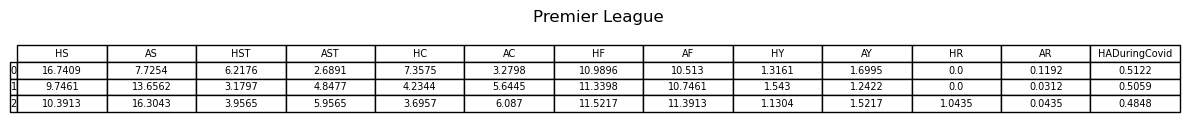

In [33]:
#Optimal value for k
optimal_k = 3 
#Apply k-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
premier_league_during_covid['Cluster'] = kmeans.fit_predict(select_features_standardised)


#cluster summary 
cluster_summary = premier_league_during_covid.groupby('Cluster')[['HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR','HADuringCovid']].mean()

#Create a figure displaying the table
fig = plt.figure(figsize = (15, .2))
ax = fig.add_subplot(111)

#Round the summaries to 4d.p.
cluster_summary = round(cluster_summary,4)


#Display the summary in a table
ax.table(cellText = cluster_summary.values, rowLabels = cluster_summary.index, 
         colLabels = cluster_summary.columns, cellLoc='center')

#Title
ax.set_title('Premier League')
#Turn the axes off
ax.axis('off')
#Show table
plt.show()